In [8]:
# Col1: Building unit type --- cancel
# Col5: Longitude --- cancel
# Col6: Latitude --- cancel
# Col8: Building Unit --- cancel

#################### 要用的 column ####################
# Col2: Building Location # 什麼大廈他大概的價錢範圍
# Col3: Building Estate
# Col4: District
# Col7: Building Floor


# Col9: Building Net Area
# Col10: Building Gross Area
# Col12: Price per net area
# Col13: Price per gross area


# Col11: Building Price hkd (Example: 787 -> 7.78 M hkd) 要轉換價格
# Col14: Transaction date
# Col15: % change from previous transaction (same unit)
# Col16: date of previous transaction
#
############################################################

In [9]:
import pandas as pd
import matplotlib.pyplot as plt




In [10]:
data = "properties.csv"
df = pd.read_csv(data, encoding='utf-8')
df_backup = df.copy()


print(df.head())
print("="*100)
print(df.info())

/var/folders/_1/w3rmdmrx14qdr85c4l_crhq80000gn/T/ipykernel_86763/4257602915.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, encoding='utf-8')


  Building unit type Building Location  Building Estate District  Longitude  \
0         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
1         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
2         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
3         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
4         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   

   Latitude Building Floor Building Unit Building Net Area  \
0   22.2871             26             A               787   
1   22.2871             26             A               787   
2   22.2871             26             B               624   
3   22.2871             26             B               624   
4   22.2871             26             B               624   

  Building Gross Area  Building Price hkd Price per net area  \
0                   -                1165             14,806   
1                   -   

In [11]:
# Drop 4 useless columns
# Remove missing values
print("缺失值统计:")
print(df.isnull().sum())

print("\n缺失值比例:")
print(df.isnull().mean().round(4) * 100)

缺失值统计:
Building unit type                                     0
Building Location                                      0
Building Estate                                        0
District                                               0
Longitude                                              0
Latitude                                               0
Building Floor                                       329
Building Unit                                       1949
Building Net Area                                      0
Building Gross Area                                    0
Building Price hkd                                     0
Price per net area                                     0
Price per gross area                                   0
Transaction date                                       0
% change from previous transaction (same unit)    652131
date of previous transaction                      652131
dtype: int64

缺失值比例:
Building unit type                                 0.00
Buil

In [12]:
# 1. 删除两列：% change from previous transaction (same unit) 和 date of previous transaction
print("Before drop:")
print("="*100)
print(df.head())

columns_to_remove = ['Price per gross area','Building Gross Area','Building unit type','Longitude','Latitude','Building Unit','% change from previous transaction (same unit)', 'date of previous transaction']
df = df.drop(columns=columns_to_remove)
print("="*100)
print("")
print("After drop:")
print("="*100)
print(df.head())


print(f"删除列后的数据形状: {df.shape}")
print(f"\n当前列名:")
print(df.columns.tolist())

# 2. 只保留 2017 和 2018 年的数据
# 将 Transaction date 转换为字符串类型（如果还不是）

print("")
print("="*100)
print("Remove year except 2017 and 2018:")
print("="*100)
df['Transaction date'] = df['Transaction date'].astype(str)

# 筛选 2017 和 2018 年的数据
df = df[df['Transaction date'].str.startswith('2017') | df['Transaction date'].str.startswith('2018')]

print(f"\n筛选后的数据形状: {df.shape}")

# 检查年份分布
df['year'] = df['Transaction date'].str[:4]
print(f"\n年份分布:")
print(df['year'].value_counts().sort_index())

# 删除临时的年份列
df = df.drop(columns=['year'])

print(f"\n前5行数据:")
print(df.head())


Before drop:
  Building unit type Building Location  Building Estate District  Longitude  \
0         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
1         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
2         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
3         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
4         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   

   Latitude Building Floor Building Unit Building Net Area  \
0   22.2871             26             A               787   
1   22.2871             26             A               787   
2   22.2871             26             B               624   
3   22.2871             26             B               624   
4   22.2871             26             B               624   

  Building Gross Area  Building Price hkd Price per net area  \
0                   -                1165             14,806   
1          

In [13]:
print(df['Price per net area'].max())
print("=======")
print(df['Price per net area'].min())


99,913
* 
				
				
					-


99,913
* 
				
				
					-


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

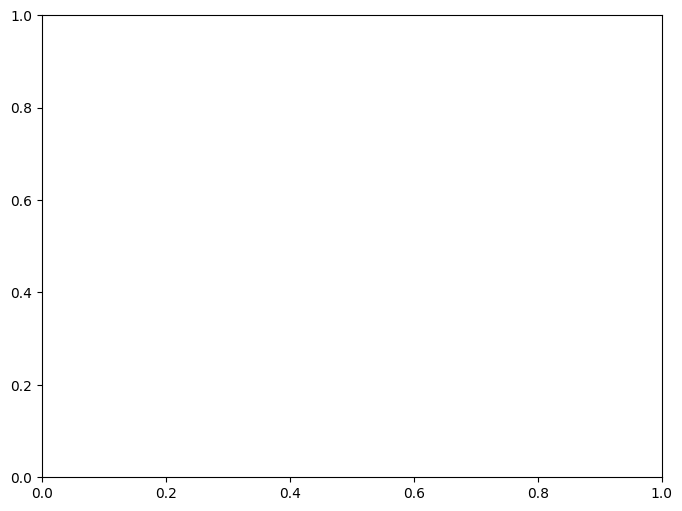

In [ ]:


print(df['Price per net area'].max())
print("=======")
print(df['Price per net area'].min())

# 为'Price per net area'列绘制简单的箱型图
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price per net area'].dropna())
plt.title('Price per net area 分布箱型图')
plt.ylabel('价格')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 75414 entries, 13 to 1262495
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Building Location   75414 non-null  object
 1   Building Estate     75414 non-null  object
 2   District            75414 non-null  object
 3   Building Floor      75377 non-null  object
 4   Building Net Area   75414 non-null  object
 5   Building Price hkd  75414 non-null  int64 
 6   Price per net area  75414 non-null  object
 7   Transaction date    75414 non-null  object
dtypes: int64(1), object(7)
memory usage: 5.2+ MB
None
